<a href="https://colab.research.google.com/github/eng-aomar/cross-selling/blob/main/bravo_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bravo Supermartk EDA notebook

---

## Objectives:

---
This project aims to develop a cross-selling recommander system that helps Bravo employees to offer a special cross-selling for their customers.


## Business Problem:


---
The Comptition between supermarkets


>[Bravo Supermartk EDA notebook](#scrollTo=YQYmSCxzyUtz)

>>[Objectives:](#scrollTo=YQYmSCxzyUtz)

>>[Business Problem:](#scrollTo=HgxH9iIYdqvz)

>>[Loading the Dataset](#scrollTo=igPijalv0jxQ)

>>>[Mounting Google Drive locally](#scrollTo=5oKaekCDLYRV)

>>>[Load the required libraries](#scrollTo=A6Yk2l4e0B48)

>>>[Load the dataset](#scrollTo=yv-AcLkZz-zw)

>>[Data Transformation](#scrollTo=M7O9W4db0o4-)

>>>[1.Data cleansing:](#scrollTo=M7O9W4db0o4-)

>>>[Dropna](#scrollTo=20X6Pfi_9yg6)

>>[Statistical Question:](#scrollTo=ousjVXQIK0av)



**Instructions**:  
All cells (blocks) below are code cells and should be edited with extreme care. Lines starting with # are comments (not executed).  
The next two cells should not be changed.  
**Important**: Click the folder icon to the left to show the session (temporary) files, then click the G drive icon (top right in the left pane) and select Connect to Google Drive. You should see a folder named drive.   
**Adjust parameters**: The easiest way is to edit the required parameters (4 items below) and run the whole script from the Runtime menu (run all).   
**Note**: It is good practice to turn off the session (Runtime -> Manage Sessions -> Terminate) after you copy the file. The system will timeout after somtime of inactivity. There is no need to change compute type.


## Loading the Dataset

### Mounting Google Drive locally

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Load the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

### 2. Load the dataset

---
Notes:
**bold text**

*   **cBrutoValue** = **GrossRetailPrice** * **Quantity**
*   **DiscountValue** is linked with **bHasPromotions** with **OfferNo**, example if **DiscountValue** = 0 then, **bHasPromotions** = 0 and **OfferNo**=0. 
if **DiscountValue**=2 then, **bHasPromotions**= -1, and **OfferNo** <>0 




In [3]:
df_items=pd.read_csv('/content/drive/My Drive/Query.csv')
df_items

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
0,30860300,1,01/09/2019 0:00:00,11.75,2,50200,142,121017,Tnuva Amek Cheese,48.0,0.24,11.75,1.95,9.80,18.8,-1,13369,103260.0,104,804,0,0
1,30860300,1,01/09/2019 0:00:00,6.00,2,50200,21718,252164,Healthy Bread Pcs,6.0,1.00,6.00,0.00,6.00,18.8,0,0,104540.0,107,804,0,0
2,30860300,1,01/09/2019 0:00:00,2.00,2,50200,75254,7622210622211,Cadbury 5Star 48G,2.0,1.00,2.00,0.00,2.00,18.8,0,0,106470.0,112,804,0,0
3,30860300,1,01/09/2019 0:00:00,1.00,2,50200,77885,6221007027751,Nesquik Biscuit Milk 56G,1.0,1.00,1.00,0.00,1.00,18.8,0,0,101520.0,112,804,0,0
4,30860301,1,01/09/2019 0:00:00,25.00,2,50201,1292,7622100919261,Marlboro Red,25.0,1.00,25.00,0.00,25.00,45.0,0,0,501024.0,108,804,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481787,31755806,1,14/12/2019 0:00:00,30.00,5,38929,63798,8906021075107,Peanut Butter Ruparels Red 510G,15.0,2.00,30.00,10.00,20.00,268.9,-1,15967,100405.0,112,847,1,628959
3481788,31755806,1,14/12/2019 0:00:00,20.00,5,38929,68245,5449000127631,Jericho Water 8*1.5L Case,10.0,2.00,20.00,3.00,17.00,268.9,-1,16124,101730.0,112,847,1,628959
3481789,31755806,1,14/12/2019 0:00:00,22.00,5,38929,69643,7290001996553,Alaa Al Deen Tissues 800G 2P,22.0,1.00,22.00,2.00,20.00,268.9,-1,14084,101590.0,108,847,1,628959
3481790,31755806,1,14/12/2019 0:00:00,40.00,5,38929,76574,6253504290055,Reema Toilet 32 Roll,40.0,1.00,40.00,8.00,32.00,268.9,-1,15482,101590.0,108,847,1,628959


## Data Transformation

### 1.Data cleansing:
Check for null values


In [4]:
df_items.isnull().any()

dTicketInternalKey         False
BravoNo                    False
Invoice_Date               False
cBrutoValue                False
POS_NO                     False
BillNo                     False
dItemInternalKey           False
Barcode                    False
ItemName                   False
GrossRetailPrice            True
Quantity                   False
TotalBeforeDisc            False
DiscValue                  False
NetSales_IncVAT            False
Total_Net_InvoiceIncVAT    False
bHasPromotions             False
OfferNo                    False
dVendorId                  False
DeptNo                     False
CashierNo                  False
CustomerGroup              False
CustomerNo                 False
dtype: bool

### 2. Dropna
The GrossRetailPrice has NAN values where ItemName = Rejected, the item is returned and not included in the Bill, so we droped it from the frame becuase it is not valid.

In [4]:
df_items[df_items.GrossRetailPrice.isnull()]

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
1106395,31172985,2,08/10/2019 0:00:00,4.99,1,86055,28355,9700192832519,Rejected,NaN,1.0,4.99,0.0,4.99,16.0,0,0,0.0,0,736,0,0
1921583,31375957,1,05/11/2019 0:00:00,19.99,7,35540,33738,9700477711362,Rejected,NaN,1.0,19.99,0.0,19.99,81.0,0,0,0.0,0,839,0,0
1923338,31376207,1,05/11/2019 0:00:00,19.99,7,35674,33738,9700477711362,Rejected,NaN,1.0,19.99,0.0,19.99,289.5,0,0,0.0,0,839,1,401844


In [6]:
df_clean= df_items.dropna()
df_clean.shape[0]

3481789

3. Check the data types

In [ ]:
df_clean.dtypes

dTicketInternalKey           int64
BravoNo                      int64
Invoice_Date                object
cBrutoValue                float64
POS_NO                       int64
BillNo                       int64
dItemInternalKey             int64
Barcode                      int64
ItemName                    object
GrossRetailPrice           float64
Quantity                   float64
TotalBeforeDisc            float64
DiscValue                  float64
NetSales_IncVAT            float64
Total_Net_InvoiceIncVAT    float64
bHasPromotions               int64
OfferNo                      int64
dVendorId                  float64
DeptNo                       int64
CashierNo                    int64
CustomerGroup                int64
CustomerNo                   int64
dtype: object

Change the type of data of DATE



In [ ]:
#df_clean['Invoice_Date']= pd.to_datetime(df_clean['Invoice_Date'] ,format = "%m/%d/%y" ,infer_datetime_format=True)

In [ ]:
df_clean.describe()

,dTicketInternalKey,BravoNo,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
count,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06
mean,3.132324e+07,3.624966e+00,1.309281e+01,2.594319e+00,4.801253e+04,4.487879e+04,5.119277e+12,1.210402e+01,1.533528e+00,1.309281e+01,1.339488e+00,1.175332e+01,1.751565e+02,-3.101187e-01,4.187299e+03,1.516755e+05,1.074356e+02,5.127829e+02,2.935948e-01,1.258388e+05
std,2.567027e+05,2.748435e+00,1.785420e+01,1.532749e+00,3.086681e+04,2.735733e+04,3.112059e+12,1.474821e+01,2.929979e+00,1.785420e+01,3.694893e+00,1.591552e+01,2.116725e+02,4.625421e-01,6.428605e+03,1.305203e+05,4.943263e+00,3.158856e+02,4.554085e-01,2.085804e+05
min,3.086030e+07,1.000000e+00,-1.771000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-7.700000e+02,-1.771000e+03,-5.079000e+01,-1.771000e+03,-9.542000e+02,-1.000000e+00,0.000000e+00,9.990000e+02,1.000000e+02,1.100000e+01,0.000000e+00,0.000000e+00
25%,3.111291e+07,1.000000e+00,4.000000e+00,1.000000e+00,2.111400e+04,1.437500e+04,3.574660e+12,3.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,4.000000e+00,3.595000e+01,-1.000000e+00,0.000000e+00,1.016400e+05,1.030000e+02,1.680000e+02,0.000000e+00,0.000000e+00
50%,3.133082e+07,3.000000e+00,9.180000e+00,2.000000e+00,4.211000e+04,5.741600e+04,6.253503e+12,7.000000e+00,1.000000e+00,9.180000e+00,0.000000e+00,8.720000e+00,1.010000e+02,0.000000e+00,0.000000e+00,1.027300e+05,1.080000e+02,6.510000e+02,0.000000e+00,0.000000e+00
75%,3.154733e+07,5.000000e+00,1.600000e+01,3.000000e+00,7.951300e+04,6.876300e+04,7.290011e+12,1.500000e+01,1.480000e+00,1.600000e+01,1.330000e+00,1.400000e+01,2.395000e+02,0.000000e+00,1.075100e+04,1.046600e+05,1.120000e+02,8.140000e+02,1.000000e+00,3.133950e+05
max,3.175581e+07,1.000000e+01,2.500000e+03,7.000000e+00,9.999900e+04,7.832400e+04,1.000000e+13,2.500000e+02,6.000000e+02,2.500000e+03,6.120000e+02,2.200000e+03,3.183750e+03,0.000000e+00,1.634600e+04,5.010600e+05,3.330000e+02,8.500000e+02,1.000000e+00,4.353006e+06


## Statistical Question:

---




### **Q1: How many customer Groups are there? **




In [6]:
df_clean.CustomerGroup.value_counts()

0    2459554
1    1022235
Name: CustomerGroup, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


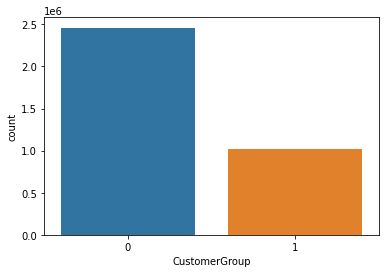

In [7]:
sns.countplot(df_clean.CustomerGroup)

The above figure shows clearly that the customer group 0 is dominentet with about 2.5 M customer, while the customer group 1 is about 1 M. The majority of the customers in the dataset are not rejesterd, i.e they don't have an ID, and hence, there is no history for their payments. 

### **Q2: What is the percentage of each group?**




0    0.706405
1    0.293595
Name: CustomerGroup, dtype: float64

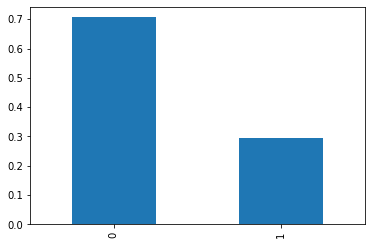

In [8]:
df_clean.CustomerGroup.value_counts(normalize=True).plot(kind='bar')
df_clean.CustomerGroup.value_counts(normalize=True)

The customers who don't have IDs **(CustomerGroup=zero)** have a percentage with ***0.7%*** while the customers  who hold Bravo Card **(CustomerGroup=one)** are only about ***0.29%***.

### **Q3: What are the monthly purchases for customers in group 1(has information on the system)?**


In [7]:
df_customers= df_clean[df_clean.CustomerGroup ==1] # only customers who have Bravo Card.
df_customers.CustomerGroup.value_counts()
df_customers['Invoice_year'] =pd.DatetimeIndex(df_customers['Invoice_Date']).year # extract the year
df_customers['Invoice_month'] = pd.DatetimeIndex(df_customers['Invoice_Date']).month # extract the month
df_customers['Invoice_day'] = pd.DatetimeIndex(df_customers['Invoice_Date']).day # extract the day
df_customers.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo,Invoice_year,Invoice_month,Invoice_day
6385,30861822,1,01/09/2019 0:00:00,10.0,3,76481,1164,24000104582,Delmonte Sweet Corn 410G,5.0,2.0,10.0,0.0,10.0,286.5,0,0,106470.0,105,844,1,300025,2019,1,9
6386,30861822,1,01/09/2019 0:00:00,4.0,3,76481,14071,7290013068125,Mashroom 400G Marina,4.0,1.0,4.0,0.0,4.0,286.5,0,0,108180.0,105,844,1,300025,2019,1,9
6387,30861822,1,01/09/2019 0:00:00,24.0,3,76481,14089,7290015174480,Tuna Marina W/ Oil 170G,6.0,4.0,24.0,0.0,24.0,286.5,0,0,101340.0,105,844,1,300025,2019,1,9
6388,30861822,1,01/09/2019 0:00:00,10.5,3,76481,14690,7290004078263,Baloons Cotton Tips Double,10.5,1.0,10.5,0.0,10.5,286.5,0,0,101450.0,109,844,1,300025,2019,1,9
6389,30861822,1,01/09/2019 0:00:00,15.0,3,76481,32335,4084500290600,Pan Pro V Smooth& Sleek400Ml,15.0,1.0,15.0,2.0,13.0,286.5,-1,15016,501020.0,109,844,1,300025,2019,1,9


In [10]:
df_customers['Invoice_month'].value_counts()


10    182016
9     175473
12    167475
11    164004
3      46354
5      46042
4      44003
6      42549
2      42470
1      41718
7      37800
8      32331
Name: Invoice_month, dtype: int64

In [11]:
df_customers['Invoice_day'].value_counts()

10    126010
11    115775
9     109416
12    101089
30     34633
28     34489
14     33581
13     33141
26     32566
29     32475
20     32155
27     30999
15     30834
19     30382
17     29811
21     29646
16     28874
25     28513
18     28491
22     27829
24     27776
23     25927
31     17823
Name: Invoice_day, dtype: int64

In [ ]:
df_customers.Invoice_Date

6385       01/09/2019 0:00:00
6386       01/09/2019 0:00:00
6387       01/09/2019 0:00:00
6388       01/09/2019 0:00:00
6389       01/09/2019 0:00:00
                  ...        
3481787    14/12/2019 0:00:00
3481788    14/12/2019 0:00:00
3481789    14/12/2019 0:00:00
3481790    14/12/2019 0:00:00
3481791    14/12/2019 0:00:00
Name: Invoice_Date, Length: 1022235, dtype: object

In [14]:
customer_group= df_customers.groupby(['CustomerNo','Invoice_month'])
customer_group['Total_Net_InvoiceIncVAT'].sum()

CustomerNo  Invoice_month
7           11                4215.2
1234        4                 2024.4
12954       1                 1282.5
            2                16327.0
            4                  869.0
                              ...   
1111425     10               11296.0
1111426     9                 4149.0
            10               14553.0
            11                9000.0
4353006     12                5826.0
Name: Total_Net_InvoiceIncVAT, Length: 41810, dtype: float64

In [ ]:
customer_group['Invoice_month'].value_counts().loc[1111426]

Invoice_month  Invoice_month
9              9                20
10             10               43
11             11               18
Name: Invoice_month, dtype: int64

In [ ]:
customers_monthly_purchese.CustomerNo.value_counts()

1111304    2159
1111191    1907
1111398    1413
440059     1276
422065     1257
           ... 
611637        1
315800        1
406165        1
411179        1
402637        1
Name: CustomerNo, Length: 15258, dtype: int64

 Q2: Is there a relationship between item has promotion and customer groups?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


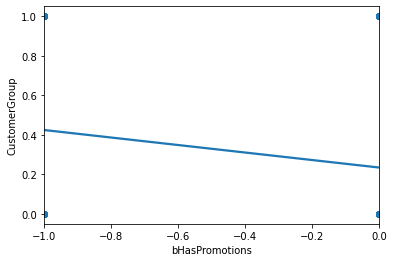

In [ ]:
sns.regplot(df_clean.bHasPromotions, df_clean.CustomerGroup)

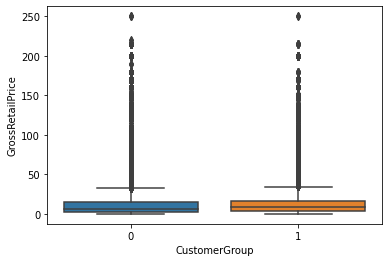

In [ ]:
sns.boxplot(x=df_clean.CustomerGroup, y=df_clean.GrossRetailPrice)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8783c97e50>,
      dtype=object)

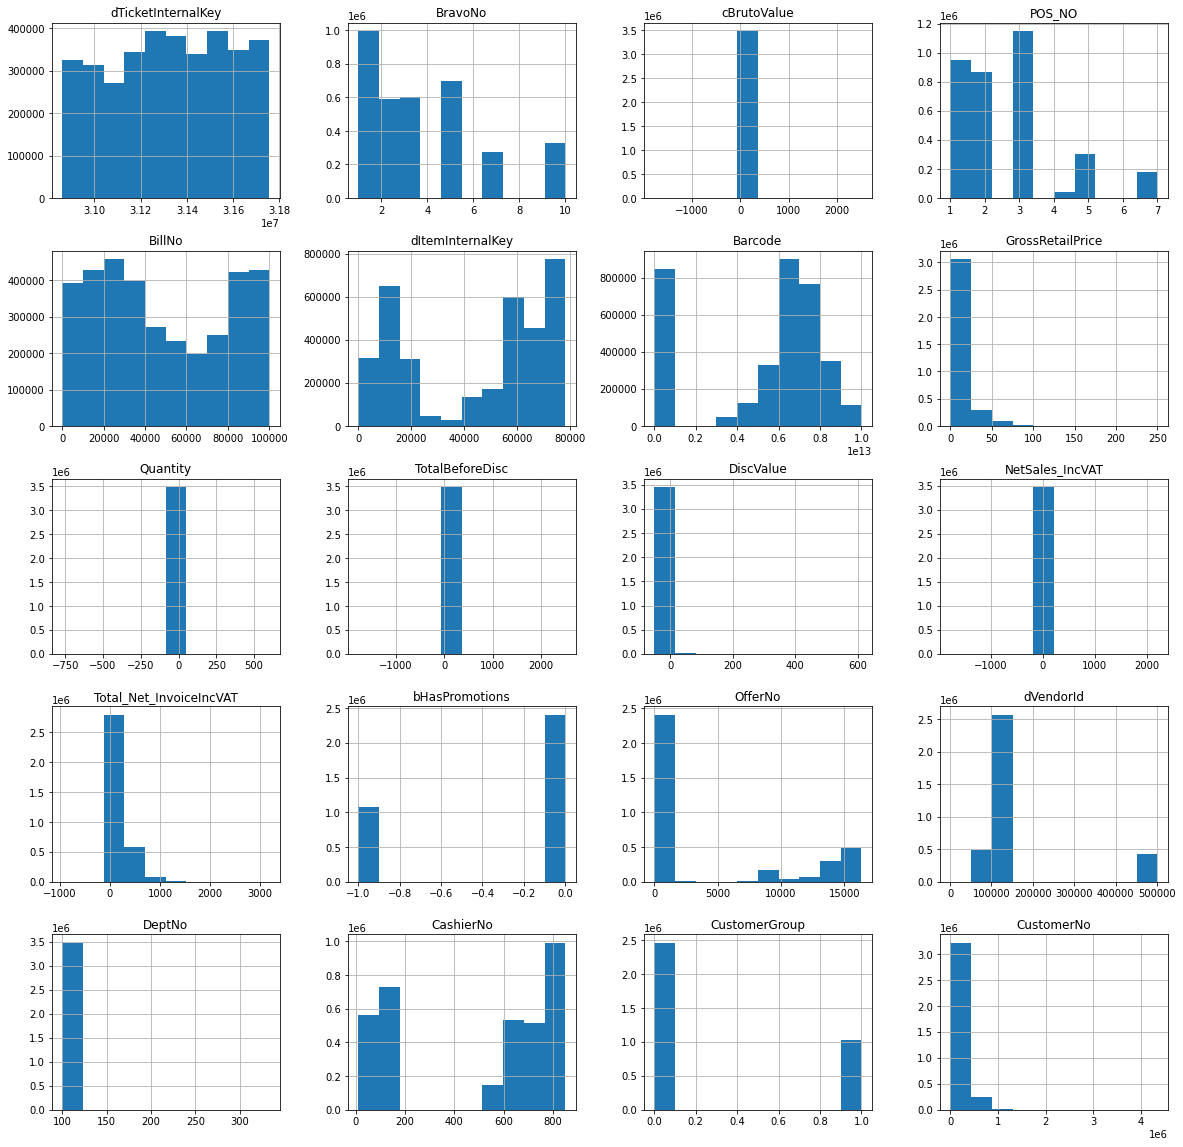

In [ ]:
df_clean.hist(figsize=(20,20))

In [ ]:
df_clean.corr()

,dTicketInternalKey,BravoNo,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
dTicketInternalKey,1.000000,-0.009538,0.005767,0.016708,-0.224305,0.002462,-0.012756,0.005516,0.005002,0.005767,0.008937,0.004395,-0.015352,-0.003982,0.005708,0.006765,-0.000670,0.010742,-0.021076,-0.019221
BravoNo,-0.009538,1.000000,-0.004550,-0.275731,0.125244,0.002634,0.076843,-0.031262,0.009354,-0.004550,0.047313,-0.016088,0.016170,-0.086112,0.083310,0.032556,0.089544,-0.924799,0.008239,0.054350
cBrutoValue,0.005767,-0.004550,1.000000,0.018050,-0.008648,-0.069914,-0.067206,0.538751,0.265597,1.000000,0.599678,0.982591,0.153490,-0.222978,0.230068,0.120098,-0.110053,0.017377,0.090864,0.091638
POS_NO,0.016708,-0.275731,0.018050,1.000000,-0.146790,0.019694,0.021059,0.016516,0.001906,0.018050,0.017437,0.016200,0.130765,-0.028458,0.026816,0.001448,-0.006775,0.340771,0.104326,0.088367
BillNo,-0.224305,0.125244,-0.008648,-0.146790,1.000000,-0.010533,0.020179,-0.006627,-0.004950,-0.008648,-0.006519,-0.008189,-0.035730,0.007505,-0.007243,0.002306,0.030210,-0.142819,-0.046566,-0.035654
dItemInternalKey,0.002462,0.002634,-0.069914,0.019694,-0.010533,1.000000,0.066773,-0.062554,0.005918,-0.069914,0.001350,-0.078743,0.032868,-0.019411,0.033142,-0.109623,-0.015122,0.010455,0.030964,0.029373
Barcode,-0.012756,0.076843,-0.067206,0.021059,0.020179,0.066773,1.000000,-0.242644,0.026160,-0.067206,0.018537,-0.079696,0.047764,-0.088144,0.099182,-0.086497,0.301413,-0.064801,0.025381,0.028200
GrossRetailPrice,0.005516,-0.031262,0.538751,0.016516,-0.006627,-0.062554,-0.242644,1.000000,-0.126760,0.538751,0.285784,0.538029,0.084707,-0.168684,0.176776,0.128431,-0.232175,0.032364,0.060468,0.054024
Quantity,0.005002,0.009354,0.265597,0.001906,-0.004950,0.005918,0.026160,-0.126760,1.000000,0.265597,0.148113,0.263564,0.047268,-0.071223,0.070161,0.014867,0.030899,-0.000916,0.026511,0.031082
TotalBeforeDisc,0.005767,-0.004550,1.000000,0.018050,-0.008648,-0.069914,-0.067206,0.538751,0.265597,1.000000,0.599678,0.982591,0.153490,-0.222978,0.230068,0.120098,-0.110053,0.017377,0.090864,0.091638


In [ ]:
df_items.shape

(3481792, 22)

In [ ]:
df_items.describe()

,dTicketInternalKey,BravoNo,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
count,3.481792e+06,3.481792e+06,3.481792e+06,3.481792e+06,3.481792e+06,3.481792e+06,3.481792e+06,3.481789e+06,3.481792e+06,3.481792e+06,3.481792e+06,3.481792e+06,3.481792e+06,3.481792e+06,3.481792e+06,3.481792e+06,3.481792e+06,3.481792e+06,3.481792e+06,3.481792e+06
mean,3.132324e+07,3.624964e+00,1.309281e+01,2.594321e+00,4.801253e+04,4.487878e+04,5.119281e+12,1.210402e+01,1.533527e+00,1.309281e+01,1.339487e+00,1.175333e+01,1.751565e+02,-3.101185e-01,4.187295e+03,1.516753e+05,1.074355e+02,5.127832e+02,2.935948e-01,1.258389e+05
std,2.567026e+05,2.748435e+00,1.785419e+01,1.532752e+00,3.086681e+04,2.735733e+04,3.112060e+12,1.474821e+01,2.929978e+00,1.785419e+01,3.694892e+00,1.591552e+01,2.116724e+02,4.625420e-01,6.428603e+03,1.305203e+05,4.944267e+00,3.158856e+02,4.554086e-01,2.085804e+05
min,3.086030e+07,1.000000e+00,-1.771000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-7.700000e+02,-1.771000e+03,-5.079000e+01,-1.771000e+03,-9.542000e+02,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00
25%,3.111291e+07,1.000000e+00,4.000000e+00,1.000000e+00,2.111400e+04,1.437500e+04,3.574660e+12,3.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,4.000000e+00,3.595000e+01,-1.000000e+00,0.000000e+00,1.016400e+05,1.030000e+02,1.680000e+02,0.000000e+00,0.000000e+00
50%,3.133082e+07,3.000000e+00,9.180000e+00,2.000000e+00,4.211000e+04,5.741600e+04,6.253503e+12,7.000000e+00,1.000000e+00,9.180000e+00,0.000000e+00,8.720000e+00,1.010000e+02,0.000000e+00,0.000000e+00,1.027300e+05,1.080000e+02,6.510000e+02,0.000000e+00,0.000000e+00
75%,3.154733e+07,5.000000e+00,1.600000e+01,3.000000e+00,7.951300e+04,6.876300e+04,7.290011e+12,1.500000e+01,1.480000e+00,1.600000e+01,1.330000e+00,1.400000e+01,2.395000e+02,0.000000e+00,1.075100e+04,1.046600e+05,1.120000e+02,8.140000e+02,1.000000e+00,3.133950e+05
max,3.175581e+07,1.000000e+01,2.500000e+03,7.000000e+00,9.999900e+04,7.832400e+04,1.000000e+13,2.500000e+02,6.000000e+02,2.500000e+03,6.120000e+02,2.200000e+03,3.183750e+03,0.000000e+00,1.634600e+04,5.010600e+05,3.330000e+02,8.500000e+02,1.000000e+00,4.353006e+06


In [ ]:
df_items.isnull().any()

dTicketInternalKey         False
BravoNo                    False
Invoice_Date               False
cBrutoValue                False
POS_NO                     False
BillNo                     False
dItemInternalKey           False
Barcode                    False
ItemName                   False
GrossRetailPrice            True
Quantity                   False
TotalBeforeDisc            False
DiscValue                  False
NetSales_IncVAT            False
Total_Net_InvoiceIncVAT    False
bHasPromotions             False
OfferNo                    False
dVendorId                  False
DeptNo                     False
CashierNo                  False
CustomerGroup              False
CustomerNo                 False
dtype: bool

In [ ]:
df_custmers=pd.read_csv('/content/drive/My Drive/Query2.csv')
df_custmers

,dCustomerId,iClubId,iStoreId,dtDate,dItemInternalKey,iDepartmentId,iItemGroupId,iSubGroupId,dVendorId,cPurchasesAmount,cDiscount,dPurchasesQuantity,iTicketId,iPoints,sPointsPromo,cVat,cSalesCost,cWasteCost
0,17746,6,1,01/09/2019 0:00:00,76832.0,108,682,802,501024.0,$25.00,$3.00,1.0,NaN,0.0,NaN,NaN,NaN,NaN
1,18484,1,1,01/09/2019 0:00:00,491.0,105,602,538,101650.0,$46.00,$0.00,2.0,NaN,0.0,NaN,NaN,NaN,NaN
2,18484,1,1,01/09/2019 0:00:00,2885.0,112,962,523,501020.0,$36.00,$10.00,2.0,NaN,0.0,NaN,NaN,NaN,NaN
3,18484,1,1,01/09/2019 0:00:00,9301.0,105,553,553,105140.0,$10.00,$0.00,1.0,NaN,0.0,NaN,NaN,NaN,NaN
4,18484,1,1,01/09/2019 0:00:00,9691.0,112,610,559,501020.0,$24.50,$4.50,1.0,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018995,154036,1,10,31/12/2019 0:00:00,69073.0,112,608,461,106470.0,$7.50,$0.00,3.0,NaN,0.0,NaN,NaN,NaN,NaN
1018996,154036,1,10,31/12/2019 0:00:00,73767.0,106,220,220,103520.0,$60.00,$12.00,1.0,NaN,0.0,NaN,NaN,NaN,NaN
1018997,154036,1,10,31/12/2019 0:00:00,74739.0,112,623,498,104660.0,$1.00,$0.00,1.0,NaN,0.0,NaN,NaN,NaN,NaN
1018998,154036,1,10,31/12/2019 0:00:00,74790.0,112,608,459,101710.0,$6.00,$0.00,1.0,NaN,0.0,NaN,NaN,NaN,NaN


In [26]:
df_netsales =df_customers [['dItemInternalKey','ItemName','BillNo','NetSales_IncVAT','bHasPromotions']]
total_sales =df_netsales.NetSales_IncVAT.sum()
total_sales

14047449.74000001

In [25]:
df_netsales_offer =df_customers [['dItemInternalKey','ItemName','BillNo','OfferNo','TotalBeforeDisc',	'DiscValue','NetSales_IncVAT','bHasPromotions']]
df_netsales_offer =df_netsales_offer[df_netsales_offer.bHasPromotions ==-1]
total_sales_with_offer = df_netsales_offer.NetSales_IncVAT.sum()
total_sales_with_offer

6874529.44

### Q: What are the items count with promotion/ items without promotion 

1.   List item
2.   List item

for each bill?

In [31]:
df_bell_items_group = df_netsales.groupby(['BillNo', 'bHasPromotions'])

df_bell_items_group['ItemName'].count()

BillNo  bHasPromotions
3       -1                 5
         0                 7
4       -1                 5
         0                17
5       -1                 8
                          ..
99991   -1                 7
         0                 1
99994   -1                 5
99999   -1                 3
         0                 6
Name: ItemName, Length: 87467, dtype: int64

### Q: What are the Net Sales sum for items with promotion/ items without promotion in each bill?

In [32]:
df_bell_items_group['NetSales_IncVAT'].sum()

BillNo  bHasPromotions
3       -1                110.00
         0                124.30
4       -1                 48.50
         0                205.20
5       -1                 85.23
                           ...  
99991   -1                101.55
         0                 10.00
99994   -1                228.00
99999   -1                 61.00
         0                 55.00
Name: NetSales_IncVAT, Length: 87467, dtype: float64

In [42]:
offer_no_unique =df_netsales_offer.OfferNo.value_counts().index
offer_no_unique
df_res =pd.DataFrame()
for item in offer_no_unique:
  print(df_netsales_offer[df_netsales_offer['OfferNo'] == item ])



Streaming output truncated to the last 5000 lines.
2340696             19632  ...             -1
2350810             19632  ...             -1
2375053             19632  ...             -1
2393165             19632  ...             -1
2424984             19632  ...             -1
2426258             19632  ...             -1
2445681             19632  ...             -1
2451570             19632  ...             -1
2461466             19632  ...             -1
2461482             19632  ...             -1
2476188             19632  ...             -1
2500292             19632  ...             -1
2639874             19632  ...             -1

[60 rows x 8 columns]
         dItemInternalKey  ... bHasPromotions
607781              48548  ...             -1
689040              27990  ...             -1
843164              48548  ...             -1
847465              48548  ...             -1
907221              48548  ...             -1
915776              48548  ...             -1
935565